In [2]:
!pip install xgboost 

In [67]:
from xgboost import XGBClassifier
import xgboost as xgb


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [68]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submit_df = pd.read_csv('sample_submission.csv')

In [119]:
train_df1 = train_df
test_df1  = test_df

train_df1['data1'] = train_df1['serum_sodium'] / int(train_df1['serum_sodium'].sum()) * 100
train_df1['data2'] = train_df1['creatinine_phosphokinase'] / (train_df1['platelets'] + train_df1['serum_creatinine'] + train_df1['serum_sodium'])
train_df1['data3'] = train_df1['ejection_fraction'] / train_df1['serum_sodium']

test_df1['data1'] = test_df1['serum_sodium'] / int(test_df1['serum_sodium'].sum()) * 100
test_df1['data2'] = test_df1['creatinine_phosphokinase'] / (test_df1['platelets'] + test_df1['serum_creatinine'] + test_df1['serum_sodium'])
test_df1['data3'] = test_df1['ejection_fraction'] / test_df1['serum_sodium']

In [120]:
train_df1.head()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target,data1,data2,data3
0,0,56,1,5882,0,38,0,185315.0104,0.844417,134,1,0,10,1,0.097924,0.031717,0.283582
1,3,50,0,1767,1,35,0,371620.3666,0.837448,136,0,0,187,1,0.099385,0.004753,0.257353
2,7,41,0,250,1,30,0,372810.2084,0.819996,139,1,0,29,1,0.101578,0.000670,0.215827
3,11,47,0,582,1,20,0,185780.6482,0.870314,137,0,0,43,0,0.100116,0.003130,0.145985
4,12,60,0,80,0,25,0,265096.3999,0.828112,136,1,0,213,0,0.099385,0.000302,0.183824


In [121]:
train_df1.describe()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target,data1,data2,data3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,999.734000,57.632000,0.41600,605.359000,0.270000,36.691000,0.237000,278330.242337,1.030258,136.841000,0.755000,0.25600,149.560000,0.198000,0.100000,0.002407,0.268093
std,578.002214,9.875328,0.49314,971.937382,0.444182,11.037089,0.425455,79543.675235,0.704616,3.405777,0.430302,0.43664,77.381072,0.398692,0.002489,0.004227,0.080262
min,0.000000,39.000000,0.00000,23.000000,0.000000,14.000000,0.000000,138173.134500,0.629178,116.000000,0.000000,0.00000,4.000000,0.000000,0.084770,0.000084,0.100000
25%,496.750000,50.000000,0.00000,93.000000,0.000000,30.000000,0.000000,256629.434900,0.798218,135.000000,1.000000,0.00000,84.500000,0.000000,0.098655,0.000335,0.214286
50%,1007.500000,58.000000,0.00000,255.000000,0.000000,35.000000,0.000000,267025.054700,0.844389,136.500000,1.000000,0.00000,185.000000,0.000000,0.099751,0.000949,0.261194
75%,1512.250000,61.000000,1.00000,582.000000,1.000000,40.000000,0.000000,279943.418975,0.956294,139.000000,1.000000,1.00000,213.000000,0.000000,0.101578,0.002258,0.300995
max,1998.000000,85.000000,1.00000,7861.000000,1.000000,70.000000,1.000000,824131.916700,8.994597,146.000000,1.000000,1.00000,285.000000,1.000000,0.106693,0.034567,0.517241


In [122]:
# 説明変数⇒X、目的変数⇒Y

X = train_df1[['age', 'anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex', 'time', 'data2']].values
Y = train_df1['target'].values
XT = test_df1[['age', 'anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex', 'time', 'data2']].values

In [123]:
# データの分割

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=0, stratify=Y)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

In [124]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 10)
(200, 10)
(800,)
(200,)


[0]	train-logloss:0.54235	eval-logloss:0.55337
[1]	train-logloss:0.45225	eval-logloss:0.47255
[2]	train-logloss:0.38958	eval-logloss:0.41937
[3]	train-logloss:0.34236	eval-logloss:0.39122
[4]	train-logloss:0.30776	eval-logloss:0.36466
[5]	train-logloss:0.27786	eval-logloss:0.35281
[6]	train-logloss:0.25477	eval-logloss:0.34349
[7]	train-logloss:0.23223	eval-logloss:0.33529
[8]	train-logloss:0.21715	eval-logloss:0.32820
[9]	train-logloss:0.20278	eval-logloss:0.32420
[10]	train-logloss:0.19021	eval-logloss:0.32287
[11]	train-logloss:0.17636	eval-logloss:0.32502
[12]	train-logloss:0.17124	eval-logloss:0.32169
[13]	train-logloss:0.16594	eval-logloss:0.32473
[14]	train-logloss:0.16266	eval-logloss:0.32300
[15]	train-logloss:0.15204	eval-logloss:0.32285
[16]	train-logloss:0.14739	eval-logloss:0.32184
[17]	train-logloss:0.13844	eval-logloss:0.32153
[18]	train-logloss:0.13556	eval-logloss:0.31909
[19]	train-logloss:0.12973	eval-logloss:0.32312
[20]	train-logloss:0.12269	eval-logloss:0.31825
[2

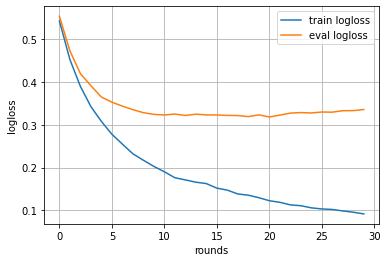

In [125]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
          'objective': 'binary:logistic',
          'eval_metric': 'logloss',
          }

    # 学習時に用いる検証用データ
evals = [(dtrain, 'train'), (dtest, 'eval')]
    # 学習過程を記録するための辞書
evals_result = {}
model = xgb.train(params,
                dtrain,
                num_boost_round=30,  # ラウンド数を増やしておく
                evals=evals,
                evals_result=evals_result,
                )

y_pred_proba = model.predict(dtest)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

# 学習の課程を折れ線グラフとしてプロットする
train_metric = evals_result['train']['logloss']
plt.plot(train_metric, label='train logloss')
eval_metric = evals_result['eval']['logloss']
plt.plot(eval_metric, label='eval logloss')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('logloss')
plt.show()

In [126]:
y_pred = model.predict(dtest)
Y_pred = np.where(y_pred > 0.5, 1, 0)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [127]:
y_test = np.array(y_test)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [128]:
# 実際の値を表示する（命令を追記すること）
from sklearn import metrics

print(metrics.accuracy_score(y_test, Y_pred))

0.87


In [129]:
# 混同行列で集計結果を表示する（命令を追記すること）
print(metrics.confusion_matrix(y_test, Y_pred))

[[152   8]
 [ 18  22]]


In [130]:
# 正答率を表示する（命令を追記すること）
print(metrics.classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       160
           1       0.73      0.55      0.63        40

    accuracy                           0.87       200
   macro avg       0.81      0.75      0.77       200
weighted avg       0.86      0.87      0.86       200



In [131]:
data = XT  # 提出ファイル
# 結果
x_pred = np.array(data)     
#予測
pred = model.predict(xgb.DMatrix(x_pred))
#小数を丸めて整数←これをしないとkaggleに提出しても正しく採点されない
y_pred = np.round(pred).astype(int)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [132]:
len(y_pred)

1000

In [133]:
Submit = test_df.loc[:,["id"]]
Submit['pred'] = y_pred
print(len(Submit))

1000


In [134]:
Submit['pred'].value_counts()

0    877
1    123
Name: pred, dtype: int64

In [135]:
Submit

,id,pred
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
995,1992,0
996,1993,0
997,1995,0
998,1997,0


In [136]:
Submit.to_csv("submit_33.csv", index=False, header=False)

In [27]:
# 27,28提出

# PassengerIdを取得
#PassengerId = np.array(test["PassengerId"]).astype(int)

# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
#my_result = pd.DataFrame(prediction_XG, PassengerId, columns = ["Survived"])

# xgb_result.csvとして書き出し
#my_result.to_csv("xgb_result.csv", index_label = ["PassengerId"])